## TP3: Análisis exploratorio de datos
En este caso retomamos el análisis exploratorio de datos pero con un nivel más avanzado. Como discutimos previamente, se puede profundizar en distintas direcciones. Aquí nos concentraremos en el análisis descriptivo estadístico y su visualización. Como primer paso cargamos los paquetes:

*En primera instancia utilizaremos una versión especifica para la correcta utilización de algunas librerías de pandas, en este caso profiling que la utilizaremos sobre el final*

In [1]:
!pip install pandas==1.5.3
!pip install ydata-profiling # Para generar un reporte completo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 24.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.19 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.

In [2]:
import numpy as np # Para funciones de algebra lineal
import pandas as pd # Manejo general de los datos
import os
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
%matplotlib inline
sns.set_color_codes = True

Pregunta, ¿Por qué esta vez no fue necesario instalar previamente algunos de los paquetes? Ahora montamos google drive y cargamos el archivo

In [3]:
from google.colab import drive
drive.mount('/content/drive')

TP2_data = ('/content/drive/MyDrive/Clases/UNPAZ/dataMining2025-main/TP2/data.csv')

Mounted at /content/drive


Ahora cargamos el archivo (recuenden revisar la ruta de acceso)

In [4]:
df = pd.read_csv (TP2_data)

## Como siempre, mirar los datos

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Como veran, es más complejos que el anterior. Veamos los últimos valores también, pregunta ¿Con head() que se imprimía?

In [5]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Ahora vamos a cambiar los nombres de las columnas, para simplificarlos

In [6]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Veamos la estructura de la base

In [7]:
df.shape

(11914, 16)

¿Qué quiere decir esto? ¿Qué conclusion hubiesen sacado si era (11914, 0) o (0,16)? Veamos si hay columnas duplicadas

## Mirar valores nulos, duplicados, errores, etc

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (715, 16)



Si las hay, las eliminamos con el siguiente comando:


In [9]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Ahora lo mismo con los valores nulos o NAs

In [10]:
df = df.dropna()    # Dropping valores nulos.
df.count()

,0
Make,7735
Model,7735
Year,7735
Engine Fuel Type,7735
HP,7735
Cylinders,7735
Transmission,7735
Drive Mode,7735
Number of Doors,7735
Market Category,7735


## Análisis univariado y detección de outliers

Ahora haremos el primer boxplot (¿Qué era? Repasemos)
Un boxplot es una manera de mostrar información sobre un grupo de números. Imaginá que tenés una caja, dividida en tres partes por dos líneas. Esas líneas representan el valor medio y los cuartiles de los números. Los cuartiles dividen los números en cuatro partes iguales. El primer cuartil representa el 25% más bajo de los números, el segundo cuartil (la línea del medio) representa el 50% medio de los números, y el tercer cuartil representa el 75% más bajo de los números.

Los "bigotes" que salen de la caja representan los valores máximos y mínimos de los números, excepto por algunos valores extraños que pueden aparecer como puntos individuales fuera de los bigotes.

Entonces, para interpretar un boxplot, podés pensar en él como una caja con bigotes. La caja representa la mayoría de los números, y los bigotes muestran hasta dónde se extienden los números en ambas direcciones. Si hay puntos individuales fuera de los bigotes, podrían ser valores extraños que podrían ser outliers.

<Axes: xlabel='Price'>

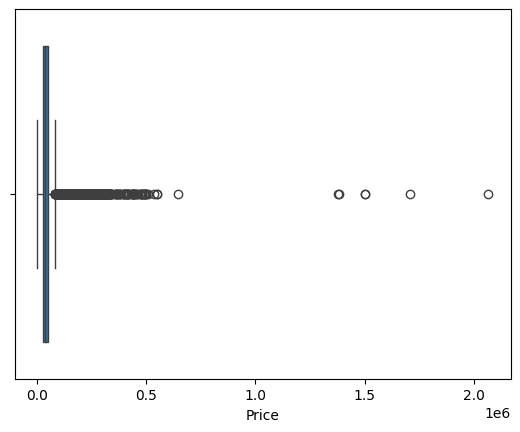

In [11]:
sns.boxplot(x=df['Price'])

Ahora para otras variables

<Axes: xlabel='HP'>

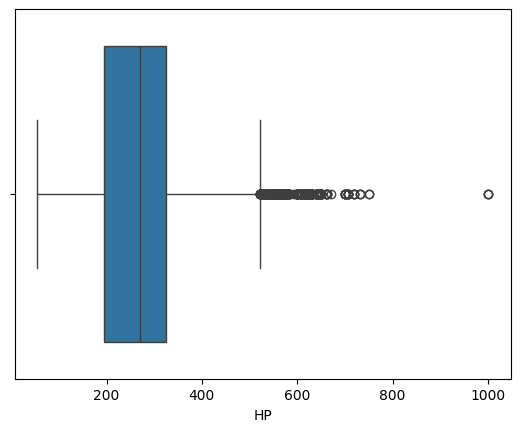

In [12]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

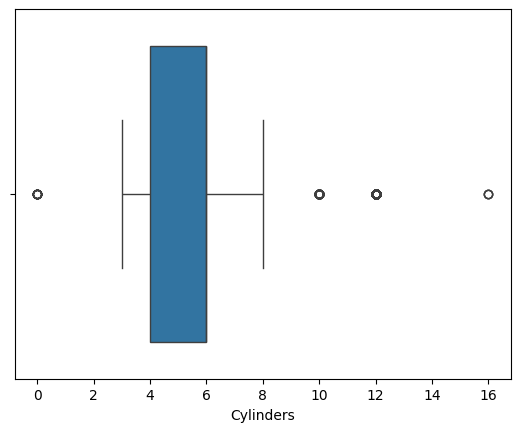

In [13]:
sns.boxplot(x=df['Cylinders'])

Vamos a prepararnos para detectar outliers, ¿Para qué servían los cuantiles en este caso?


In [14]:
# Asegurándonos de que solo consideramos columnas numéricas para el cálculo del IQR
numerico_df = df.select_dtypes(include=['number'])

# Calcular Q1, Q3, y IQR solo para las columnas numéricas
Q1 = numerico_df.quantile(0.25)
Q3 = numerico_df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

Year                   6.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1489.0
Price              23252.5
dtype: float64


In [15]:
Q1


,0.25
Year,2010.0
HP,194.0
Cylinders,4.0
Number of Doors,2.0
MPG-H,22.0
MPG-C,16.0
Popularity,520.0
Price,26225.0


Y ahora eliminamos los outliers, previamente creamos una máscara para identificarlos


In [16]:
# Crear una máscara para identificar las filas que tienen al menos un outlier
mask = (numerico_df < (Q1 - 1.5 * IQR)) | (numerico_df > (Q3 + 1.5 * IQR))

In [17]:
df_filtrado = df[~mask.any(axis=1)]
df_filtrado.shape

(5622, 16)

Ahora, con las cosas un poco más "limpias", vamos a una representación o tablero que describa los análisis fundamentales sobre las variables. Para esto importamos un sub paquete de pandas llamado pandas_profiling, utilizando la función ProfileReport, que genera un reporte bastante exhaustivo.

In [18]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

Ahora guardémoslo

In [ ]:
#report.to_file("/content/drive/MyDrive/IMD/TP2/Reporte.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## ¿Correlación?
Una de los factores que menciona el reporte es la correlación. Como vamos a ver más adelante, resulta muy importante para varios tipos de análisis. Vamos a hacer otro tipo de gráfico más detallado para estudiarla, en este caso analizamos correlación de pearson.

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.234461,-0.051369,0.189846,0.219893,0.183083,0.126803,0.125162
HP,0.234461,1.000000,0.811138,-0.212644,-0.468328,-0.510151,0.036553,0.655522
Cylinders,-0.051369,0.811138,1.000000,-0.192441,-0.597864,-0.613399,0.010051,0.589557
Number of Doors,0.189846,-0.212644,-0.192441,1.000000,0.114555,0.150835,-0.042345,-0.193079
MPG-H,0.219893,-0.468328,-0.597864,0.114555,1.000000,0.818331,0.033672,-0.255595
MPG-C,0.183083,-0.510151,-0.613399,0.150835,0.818331,1.000000,0.036893,-0.266632
Popularity,0.126803,0.036553,0.010051,-0.042345,0.033672,0.036893,1.000000,-0.054615
Price,0.125162,0.655522,0.589557,-0.193079,-0.255595,-0.266632,-0.054615,1.000000


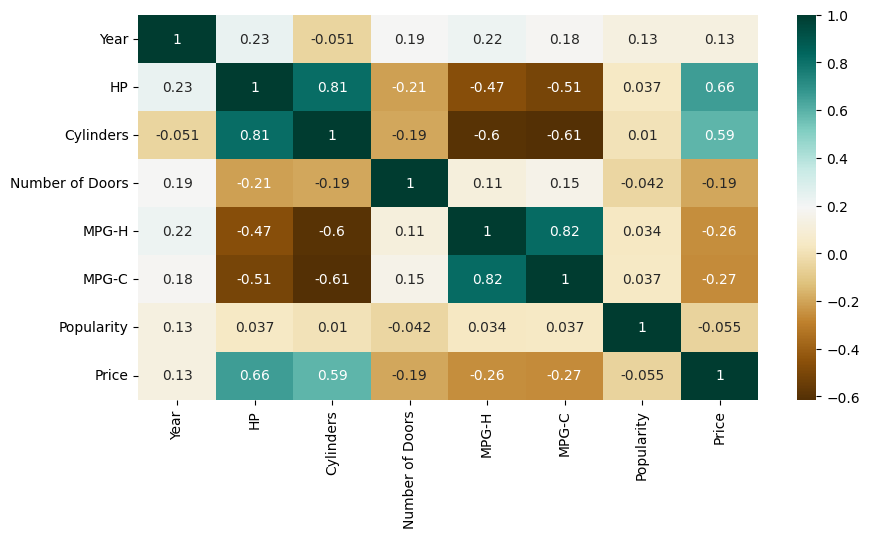

In [19]:
plt.figure(figsize=(10,5))
c= numerico_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c